## Imports and load data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import HTML

In [3]:
df = pd.read_csv('../raw_data/train.csv')
df.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...


## Explorator UGLY

In [16]:
## Check whether there are a lot of type change in the middle of a sentence
count=0
others=[]
for i in range(len(df)):
    if '.' in df.loc[i,'discourse_text'][-3:]:
        count+=1
        others.append(df.loc[i,'discourse_text'][-1])

In [17]:
count/len(df)

0.6694988668888997

In [18]:
discourse_type = df['discourse_type'].unique().tolist()
discourse_type

['Lead',
 'Position',
 'Evidence',
 'Claim',
 'Concluding Statement',
 'Counterclaim',
 'Rebuttal']

In [19]:
df_grouped=df.groupby('id').agg(list).reset_index()

In [20]:
df_grouped.head(3)

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,0000D23A521A,"[1617734767734.0, 1617734782429.0, 16177348077...","[0.0, 170.0, 358.0, 438.0, 627.0, 722.0, 836.0...","[170.0, 357.0, 438.0, 626.0, 722.0, 836.0, 101...","[Some people belive that the so called ""face"" ...","[Position, Evidence, Evidence, Claim, Counterc...","[Position 1, Evidence 1, Evidence 2, Claim 1, ...",[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 1...
1,00066EA9880D,"[1621104238021.0, 1621104245981.0, 16211043488...","[0.0, 456.0, 638.0, 738.0, 1399.0, 1488.0, 231...","[455.0, 592.0, 738.0, 1398.0, 1487.0, 2219.0, ...",[Driverless cars are exaclty what you would ex...,"[Lead, Position, Claim, Evidence, Claim, Evide...","[Lead 1, Position 1, Claim 1, Evidence 1, Clai...",[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 1...
2,000E6DE9E817,"[1617296637311.0, 1617296650644.0, 16172966674...","[17.0, 64.0, 158.0, 310.0, 438.0, 551.0, 776.0...","[56.0, 157.0, 309.0, 422.0, 551.0, 775.0, 961....","[I am arguing against the policy change , even...","[Position, Counterclaim, Rebuttal, Evidence, C...","[Position 1, Counterclaim 1, Rebuttal 1, Evide...","[2 3 4 5 6 7 8, 10 11 12 13 14 15 16 17 18 19 ..."


In [21]:
## create function to retrieve the original essay
def get_full_text(essay_id):
    path=f'../raw_data/train/{essay_id}.txt'
    with open(path,'r') as f:
        text = f.read()
    return text

In [22]:
get_full_text('0000D23A521A')

'Some people belive that the so called "face" on mars was created by life on mars. This is not the case. The face on Mars is a naturally occuring land form called a mesa. It was not created by aliens, and there is no consiracy to hide alien lifeforms on mars. There is no evidence that NASA has found that even suggests that this face was created by aliens.\n\nA mesa is a naturally occuring rock formation, that is found on Mars and Earth. This "face" on mars only looks like a face because humans tend to see faces wherever we look, humans are obviously extremely social, which is why our brain is designed to recognize faces.\n\nMany conspiracy theorists believe that NASA is hiding life on Mars from the rest of the world. These people would be very wrong. If NASA found life on Mars, then they would get millions of people\'s attention. NASA\'s budget would increase drasticly, which means that their workers would get paid more. There is no good reason that NASA would hide life on Mars from th

In [23]:
essay_ids=df['id'].unique().tolist()

In [24]:
full_texts={id_:get_full_text(id_) for id_ in essay_ids}

In [25]:
essays_df=pd.DataFrame(full_texts,index=[0]).T.reset_index().rename(columns={'index':'id',0:'text'})

In [26]:
essays_df.set_index('id',inplace=True)

In [27]:
df.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...


In [28]:
def create_gaps(df):
    #first order to make sure 
    df_=df.sort_values(['id','discourse_start']).reset_index(drop=True)
    gaps_df = pd.DataFrame(columns=df.columns)
    counter_none=0
    for i in range(1,len(df_)):
    #CASE WHEN NEW ESSAY
        if df_.loc[i,'id']!=df_.loc[i-1,'id'] :
            counter_none=0
            #CASE WHEN NEW ESSAY BEGINNING IS NOT LABELLED
            if df_.loc[i,'discourse_start']!=0:
                ## APPEND SAVE DF
                counter_none+=1
                gaps_df=gaps_df.append(dict(id=df_.loc[i,'id'],
                                       discourse_start=0,
                                       discourse_end=df_.loc[i+1,'discourse_start']-1,
                                       discourse_type = 'None',
                                       discourse_type_num = f'None {counter_none}'),ignore_index=True)
                
                
            #REGULAR CASE : THE CURRENT LINE BELONGS TO THE SAME ESSAY AS THE PREVIOUS ONE
        else:
            #CASE WHEN IT IS NOT CONTINUOUS WITH THE PREVIOUS ONE
            if df_.loc[i-1,'discourse_end'] +1 != df_.loc[i,'discourse_start']:
                counter_none+=1
                gaps_df=gaps_df.append(dict(id=df_.loc[i,'id'],
                                   discourse_start=df_.loc[i-1,'discourse_end']+1,
                                   discourse_end=df_.loc[i,'discourse_start']-1,
                                   discourse_type = 'None',
                                   discourse_type_num = f'None {counter_none}'),ignore_index=True)
    
    gaps_df=gaps_df.merge(essays_df,right_index=True,left_on='id')
    
    return gaps_df

In [29]:
def slicer(df):
    return df['text'][int(df['discourse_start']):int(df['discourse_end'])]
    

In [30]:
df_sample=df[0:200]
df_filled = create_gaps(df_sample)

In [31]:
df_filled['discourse_text'] = df_filled.apply(slicer,axis=1)

In [32]:
df_filled.shape

(44, 9)

In [33]:
df_full = df_sample.append(df_filled.drop(columns='text'))

In [34]:
df_full

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...
...,...,...,...,...,...,...,...,...
39,DE628D1F2F9D,NaN,394.0,398.0,and,None,None 4,NaN
40,E05C7F5C1156,NaN,456.0,454.0,,None,None 1,NaN
41,E05C7F5C1156,NaN,610.0,781.0,"herefore, driving can cause many accidents tha...",None,None 2,NaN
42,E05C7F5C1156,NaN,938.0,936.0,,None,None 3,NaN


In [35]:
discourse_type

['Lead',
 'Position',
 'Evidence',
 'Claim',
 'Concluding Statement',
 'Counterclaim',
 'Rebuttal']

In [36]:
colors={'Lead':'#DB3838',
 'Position':'#AAE10D',
 'Evidence':'#0DE1A7',
 'Claim':'#DF3CEC',
 'Concluding Statement':'#7c9bf7',
 'Counterclaim':'#FFF942',
 'Rebuttal':'#FFCE26',
       'None':'#FFFFFF'}

In [37]:
def render_html(df):
    return f"<span style='background-color:{colors[df['discourse_type']]}'> {df['discourse_text']} </span> <b style='background-color:{colors[df['discourse_type']]}'> [{df['discourse_type']}] </b>"
    

In [38]:
df_full['html']=df_full.apply(render_html,axis=1)

In [39]:
df_full.sort_values(['id','discourse_start'],inplace=True)

In [40]:
df_html = df_full.groupby('id').agg({'html': ' '.join})

In [41]:
df_html.reset_index(inplace=True)

In [42]:
HTML(df_html.loc[3,'html'])

In [43]:
df_html.shape

(23, 2)

In [44]:
for i in range(22):
    print(f'------------- text {i} -------------')
    display(HTML(df_html.loc[i,'html']))

------------- text 0 -------------


------------- text 1 -------------


------------- text 2 -------------


------------- text 3 -------------


------------- text 4 -------------


------------- text 5 -------------


------------- text 6 -------------


------------- text 7 -------------


------------- text 8 -------------


------------- text 9 -------------


------------- text 10 -------------


------------- text 11 -------------


------------- text 12 -------------


------------- text 13 -------------


------------- text 14 -------------


------------- text 15 -------------


------------- text 16 -------------


------------- text 17 -------------


------------- text 18 -------------


------------- text 19 -------------


------------- text 20 -------------


------------- text 21 -------------


In [45]:
df_full.shape

(244, 9)

In [46]:
df_full.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring,html
115,019328A0D7A3,1.622467e+12,20.0,370.0,Look around you! All you see is people from al...,Lead,Lead 1,3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20...,<span style='background-color:#DB3838'> Look a...
116,019328A0D7A3,1.622467e+12,371.0,476.0,Phones can be such a distraction to everyone a...,Claim,Claim 1,65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 8...,<span style='background-color:#DF3CEC'> Phones...
117,019328A0D7A3,1.622467e+12,477.0,1321.0,A major cause of deaths in the US is motor veh...,Evidence,Evidence 1,83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 9...,<span style='background-color:#0DE1A7'> A majo...
118,019328A0D7A3,1.622467e+12,1322.0,1435.0,Many people may say that teens are the ones dr...,Counterclaim,Counterclaim 1,229 230 231 232 233 234 235 236 237 238 239 24...,<span style='background-color:#FFF942'> Many p...
119,019328A0D7A3,1.622467e+12,1436.0,1498.0,"In reality, everyone from every age is irrespo...",Rebuttal,Rebuttal 1,248 249 250 251 252 253 254 255 256,<span style='background-color:#FFCE26'> In rea...


## FINDINGS

### Is there a lot of discourse that are not sentences ? 

In [4]:
## Check whether there are a lot of type change in the middle of a sentence
count=0
others=[]
for i in range(len(df)):
    if '.' in df.loc[i,'discourse_text'][-3:]:
        count+=1
        others.append(df.loc[i,'discourse_text'][-1])

In [5]:
print(f'Proportion of discourse that are not sentences : {(1-count/len(df))*100:.2f}%')

Proportion of discourse that are not sentences : 33.05%


### Distribution of length of discourses

In [6]:
def mylen(text):
    return len(text.split())

In [7]:
df['discourse_len']=df['discourse_text'].apply(mylen)

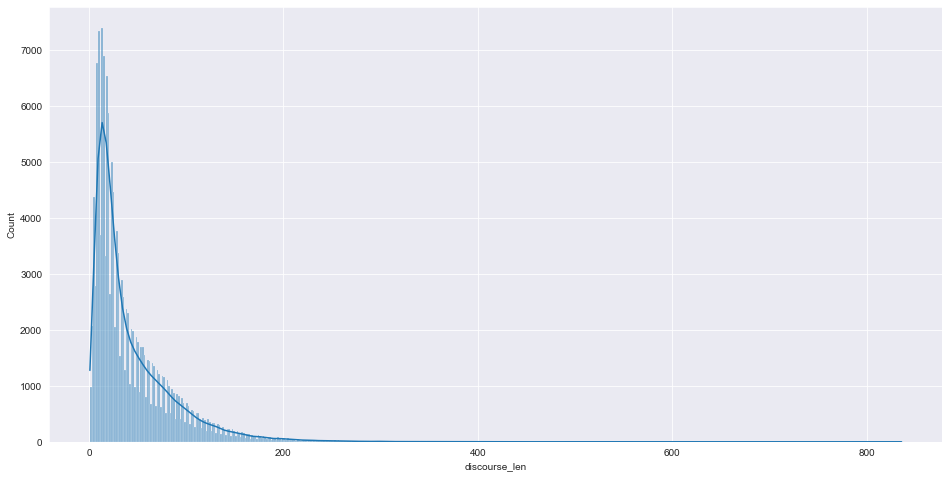

In [8]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
sns.histplot(df['discourse_len'],kde=True,);

In [9]:
types=df.discourse_type.unique()
colors=sns.color_palette("Set1")

In [10]:
sns.color_palette("Set1")

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

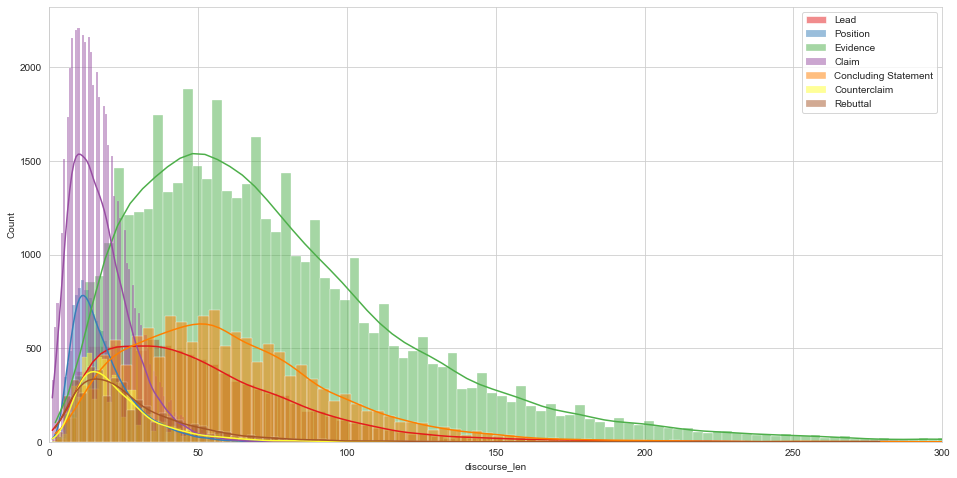

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
for t,c in zip(types,colors):
    sns.histplot(df[df['discourse_type']==t]['discourse_len'],kde=True,color=c,label=t)
plt.xlim((0,300))
plt.legend();

### Is there a lot of discourse that starts or ends with a None type ?

In [12]:
## returns the length of the essay from .txt file
def get_len_essay(id_):
    with open(f'../raw_data/train/{id_}.txt','r') as file:
        text = file.read()
    return len(text)

In [69]:
## create DF with first discourse start and last discourse end
df_none=df.groupby('id').agg({'discourse_start':'first','discourse_end':'last'}).reset_index()
## flag none_starter
df_none['none_starter']=np.where(df_none['discourse_start']>3,1,0)
## get len of essay
df_none['essay_len']=df_none['id'].apply(get_len_essay)
## flag none_ender
df_none['none_ender']=np.where(df_none['essay_len']-df_none['discourse_end']>3,1,0)
## flag none_limit
df_none['none_limit']=np.where(np.logical_or(df_none['none_starter']==1,df_none['none_ender']==1),1,0)

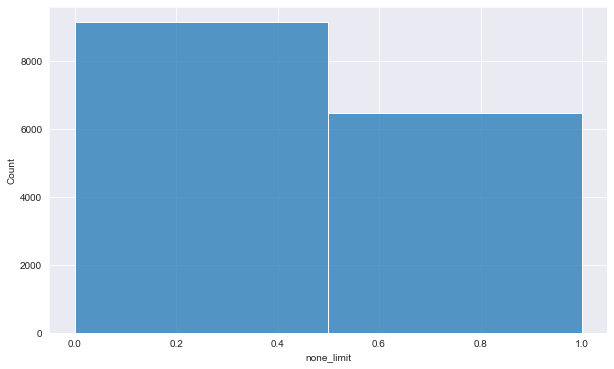

In [71]:
plt.figure(figsize=(10,6))
sns.histplot(df_none['none_limit'],bins=2);

**Let's not take care of this for now and keep it for later improvement.**

### What is the length in term of words of an essay

In [14]:
df_per_essay=df.groupby('id').agg({'discourse_len':sum})

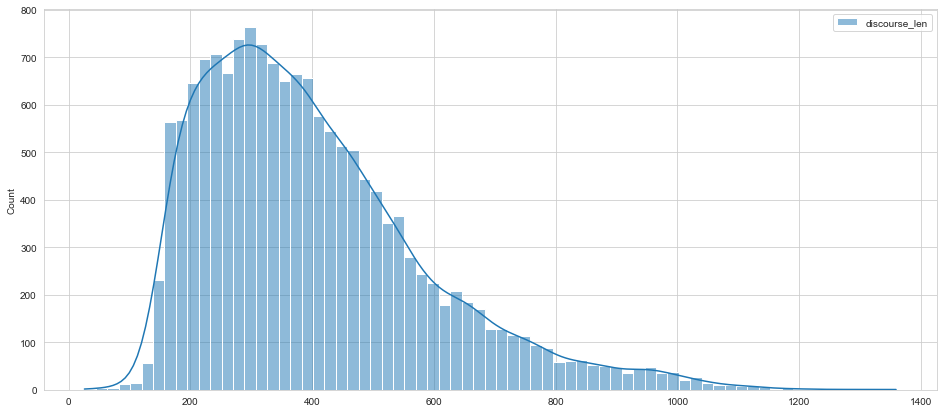

In [18]:
plt.figure(figsize=(16,7))
sns.histplot(df_per_essay,kde=True);

<AxesSubplot:xlabel='discourse_type', ylabel='count'>

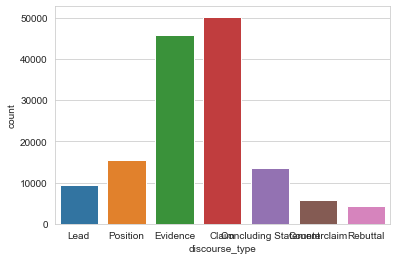

In [30]:
sns.countplot(x=df['discourse_type'])

In [47]:
(df.groupby('discourse_type').count()['id']/len(df)).map(lambda x : f'{x*100:.1f}%')

discourse_type
Claim                   34.8%
Concluding Statement     9.4%
Counterclaim             4.0%
Evidence                31.7%
Lead                     6.4%
Position                10.7%
Rebuttal                 3.0%
Name: id, dtype: object